### importing Libraries

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib as mt
import matplotlib.pyplot as plt

### Readings file

In [33]:
Survey=pd.read_excel("NigerianGraduates.xlsx")

In [ ]:
#Survey.head()
#Survey.info()
#Survey.isnull().sum()

#### Visualizing the distribution of each columns with only the seven topmost choices using Pie chart

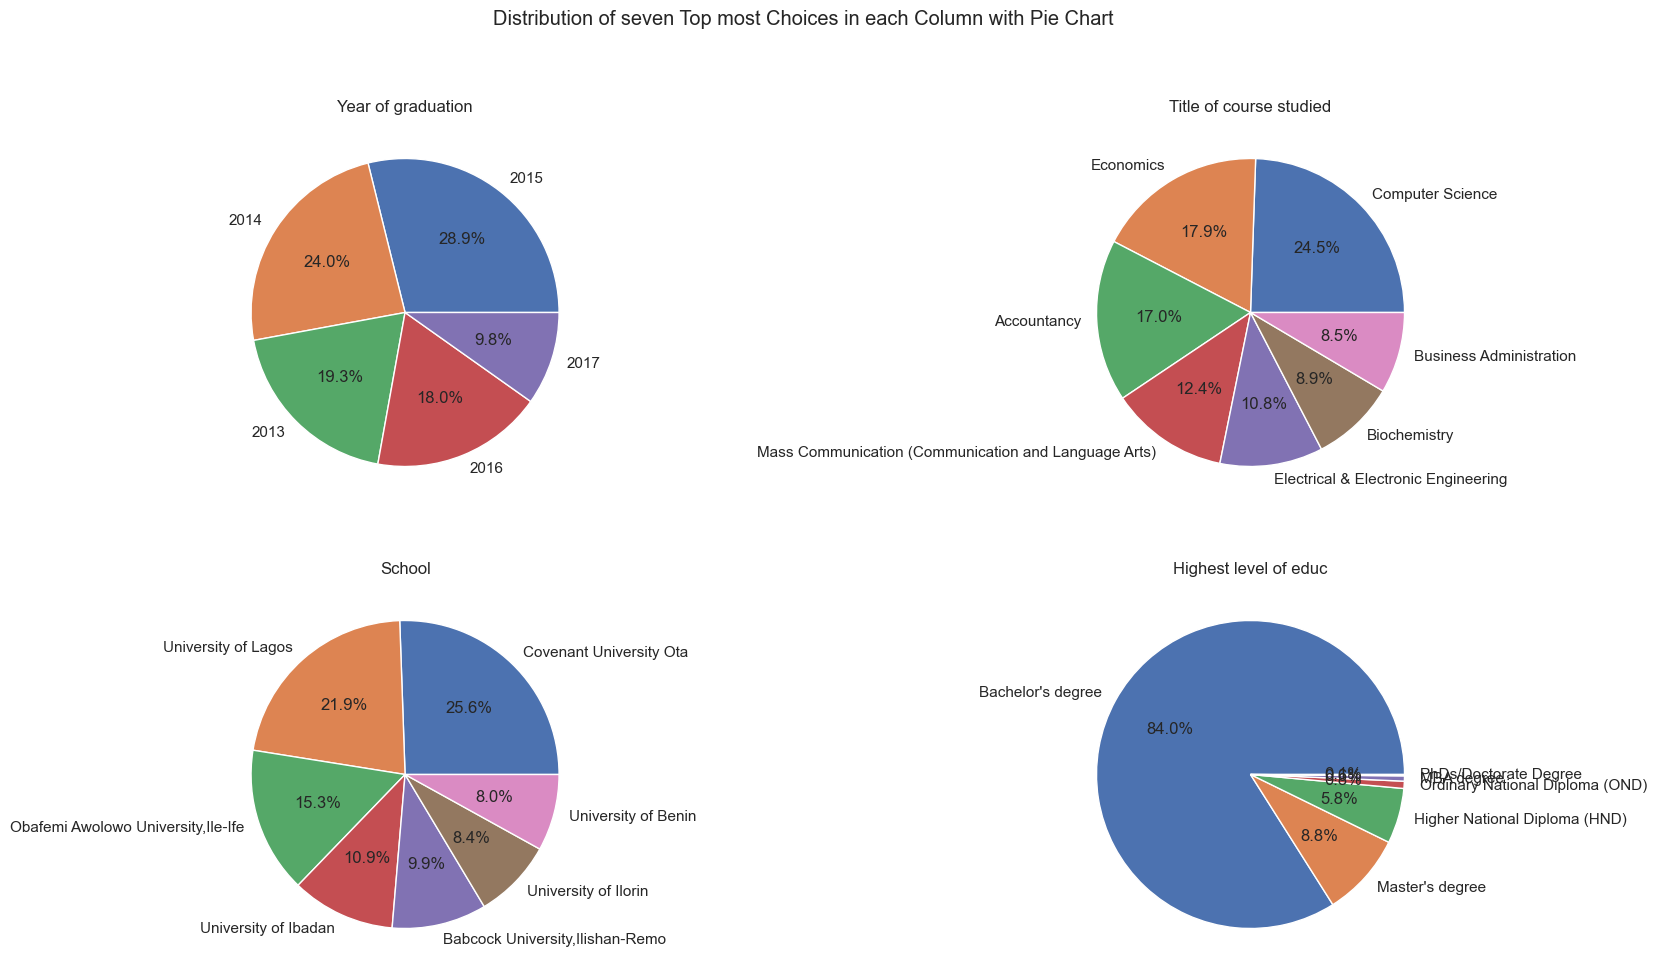

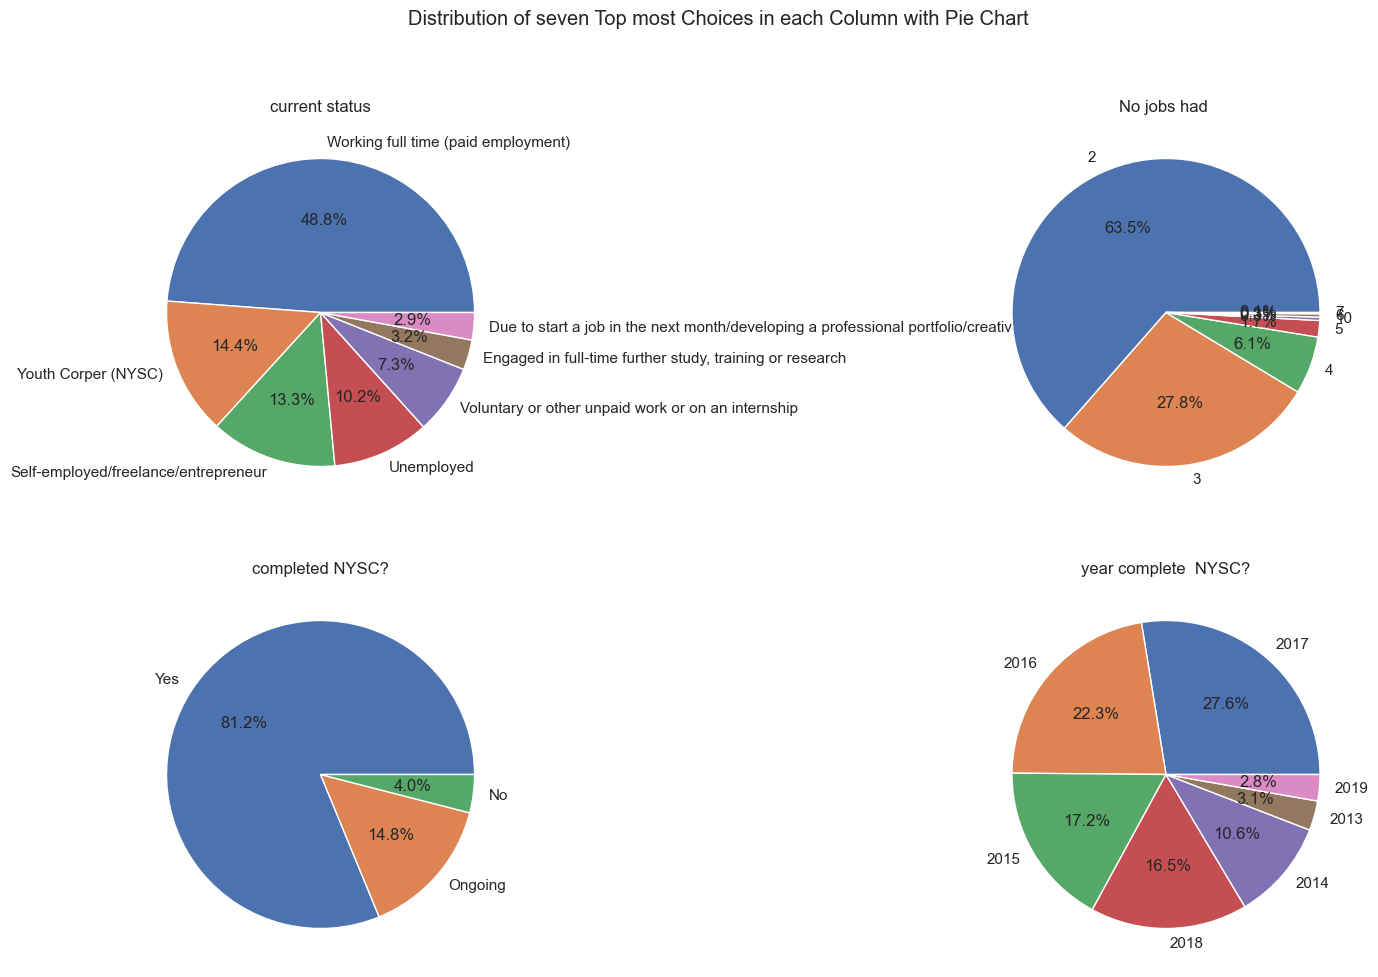

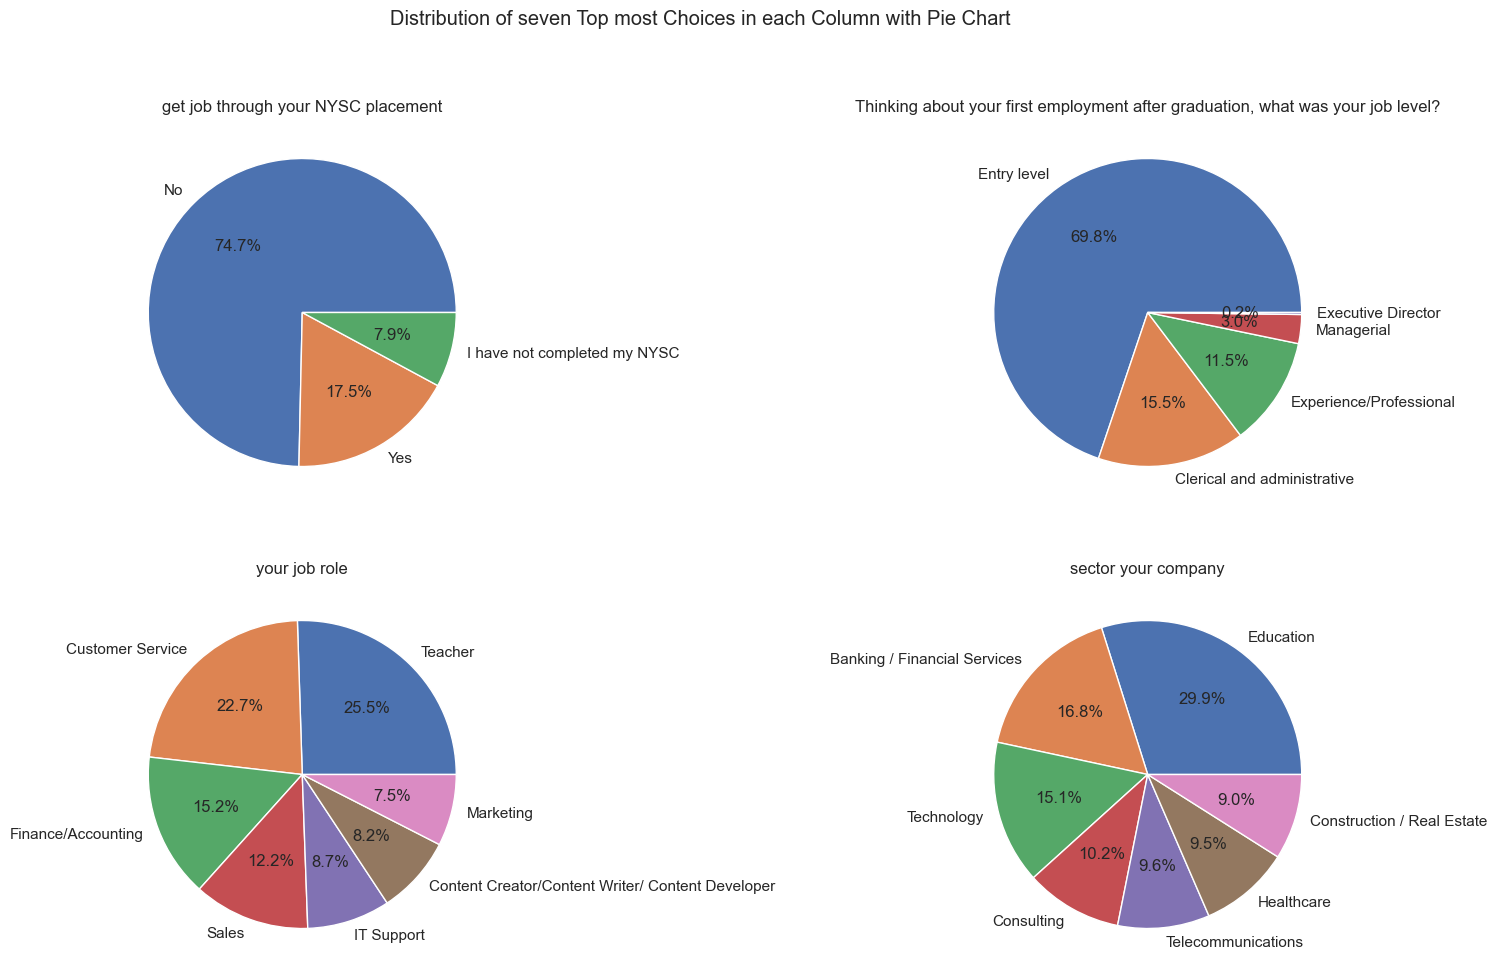

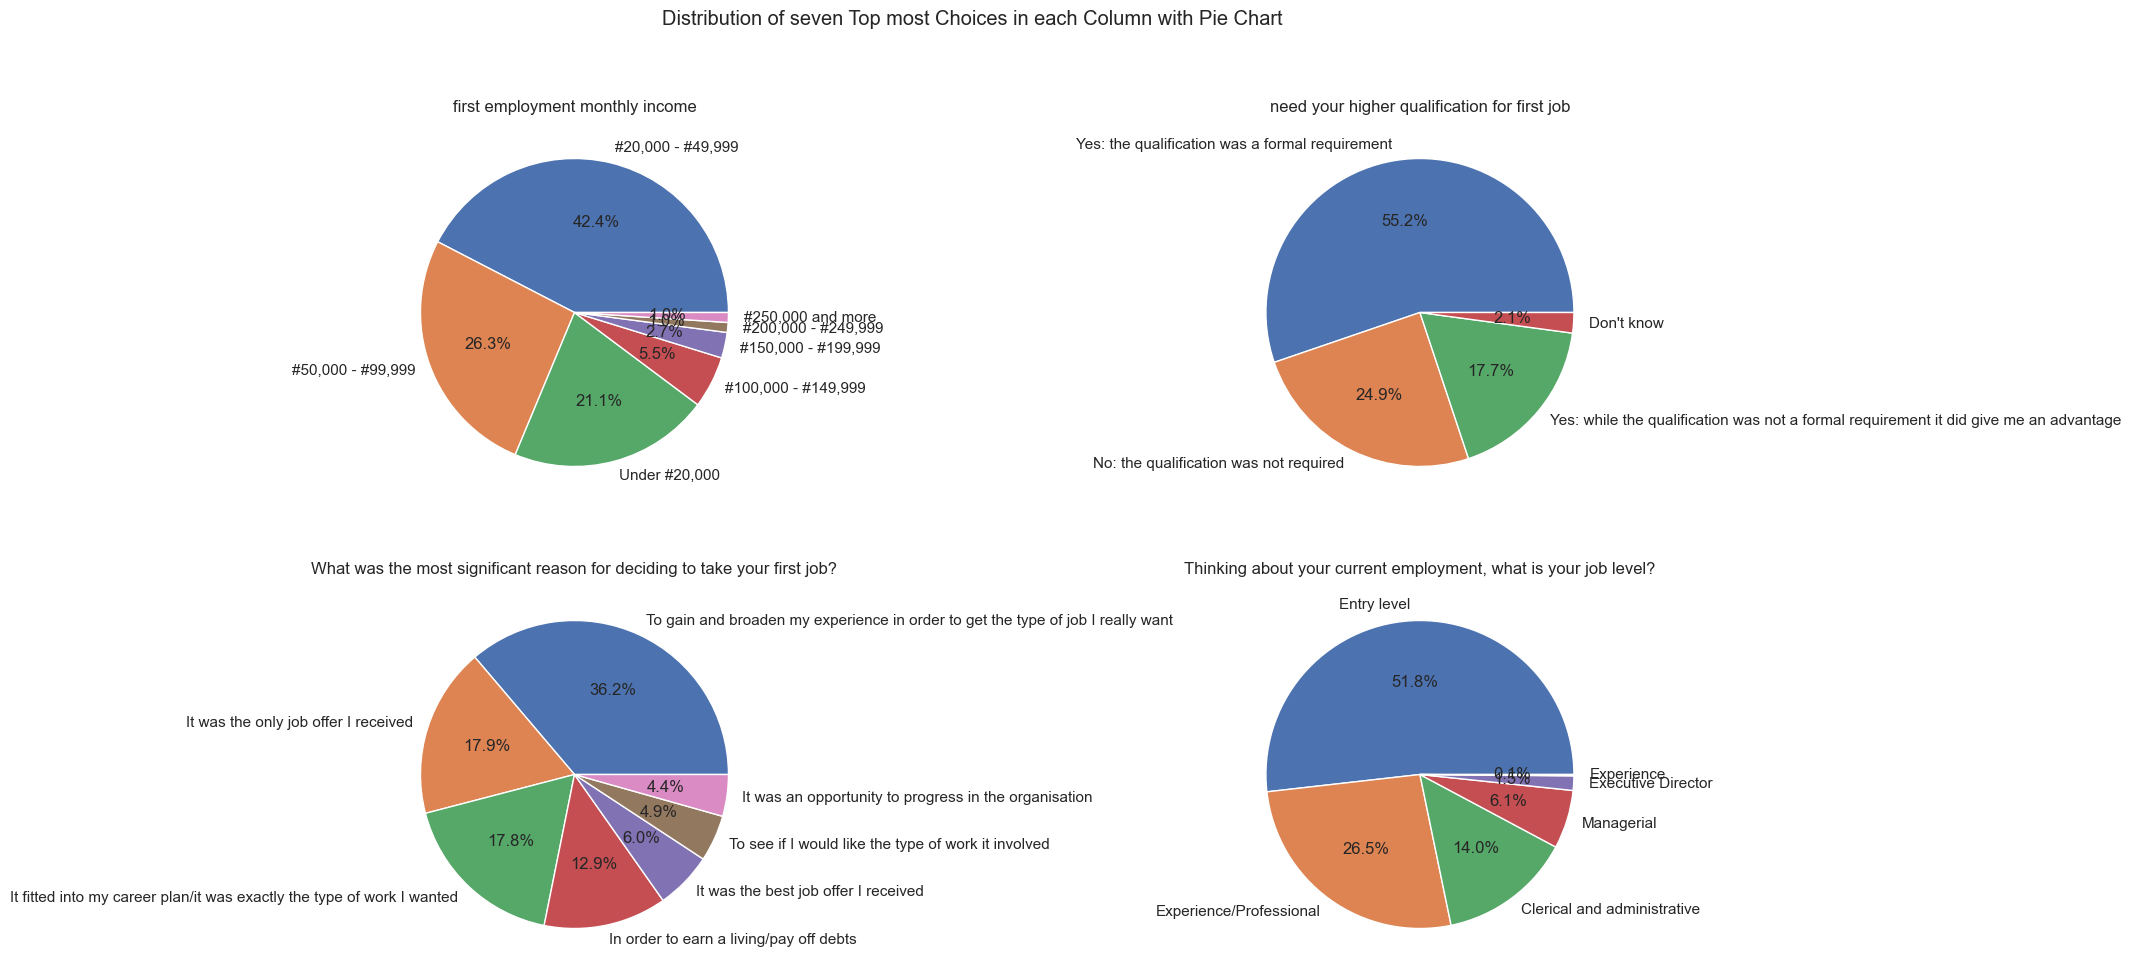

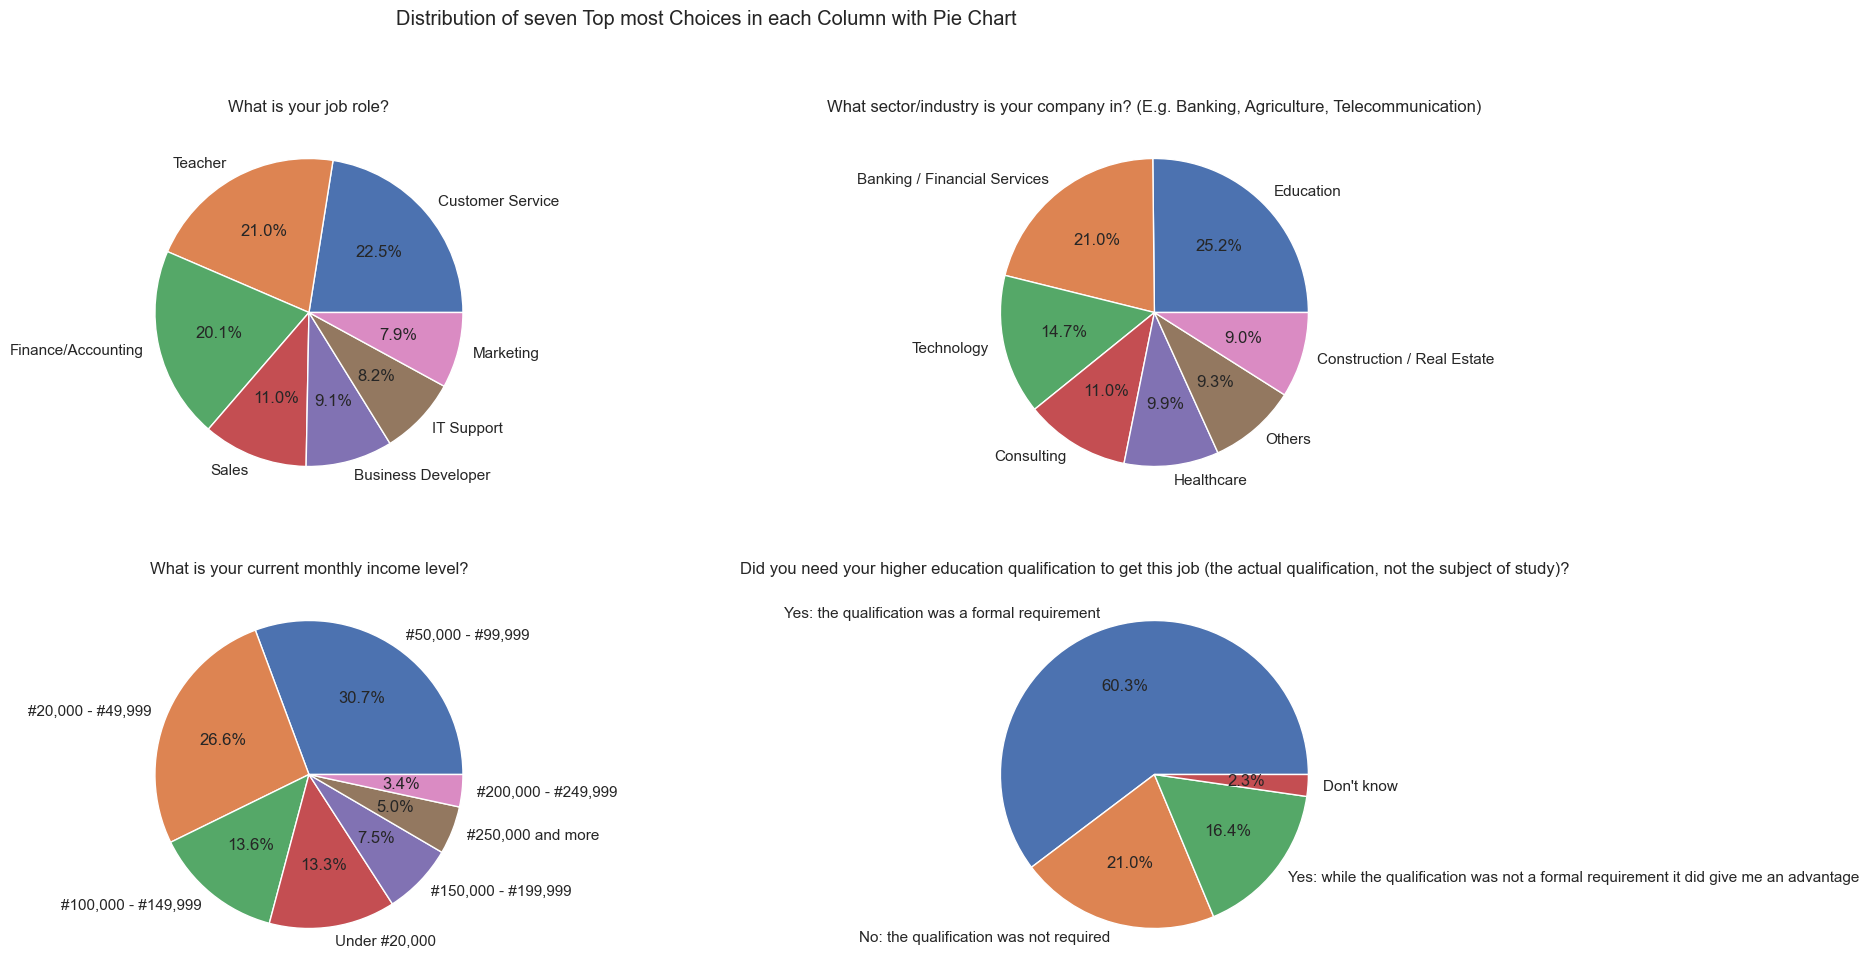

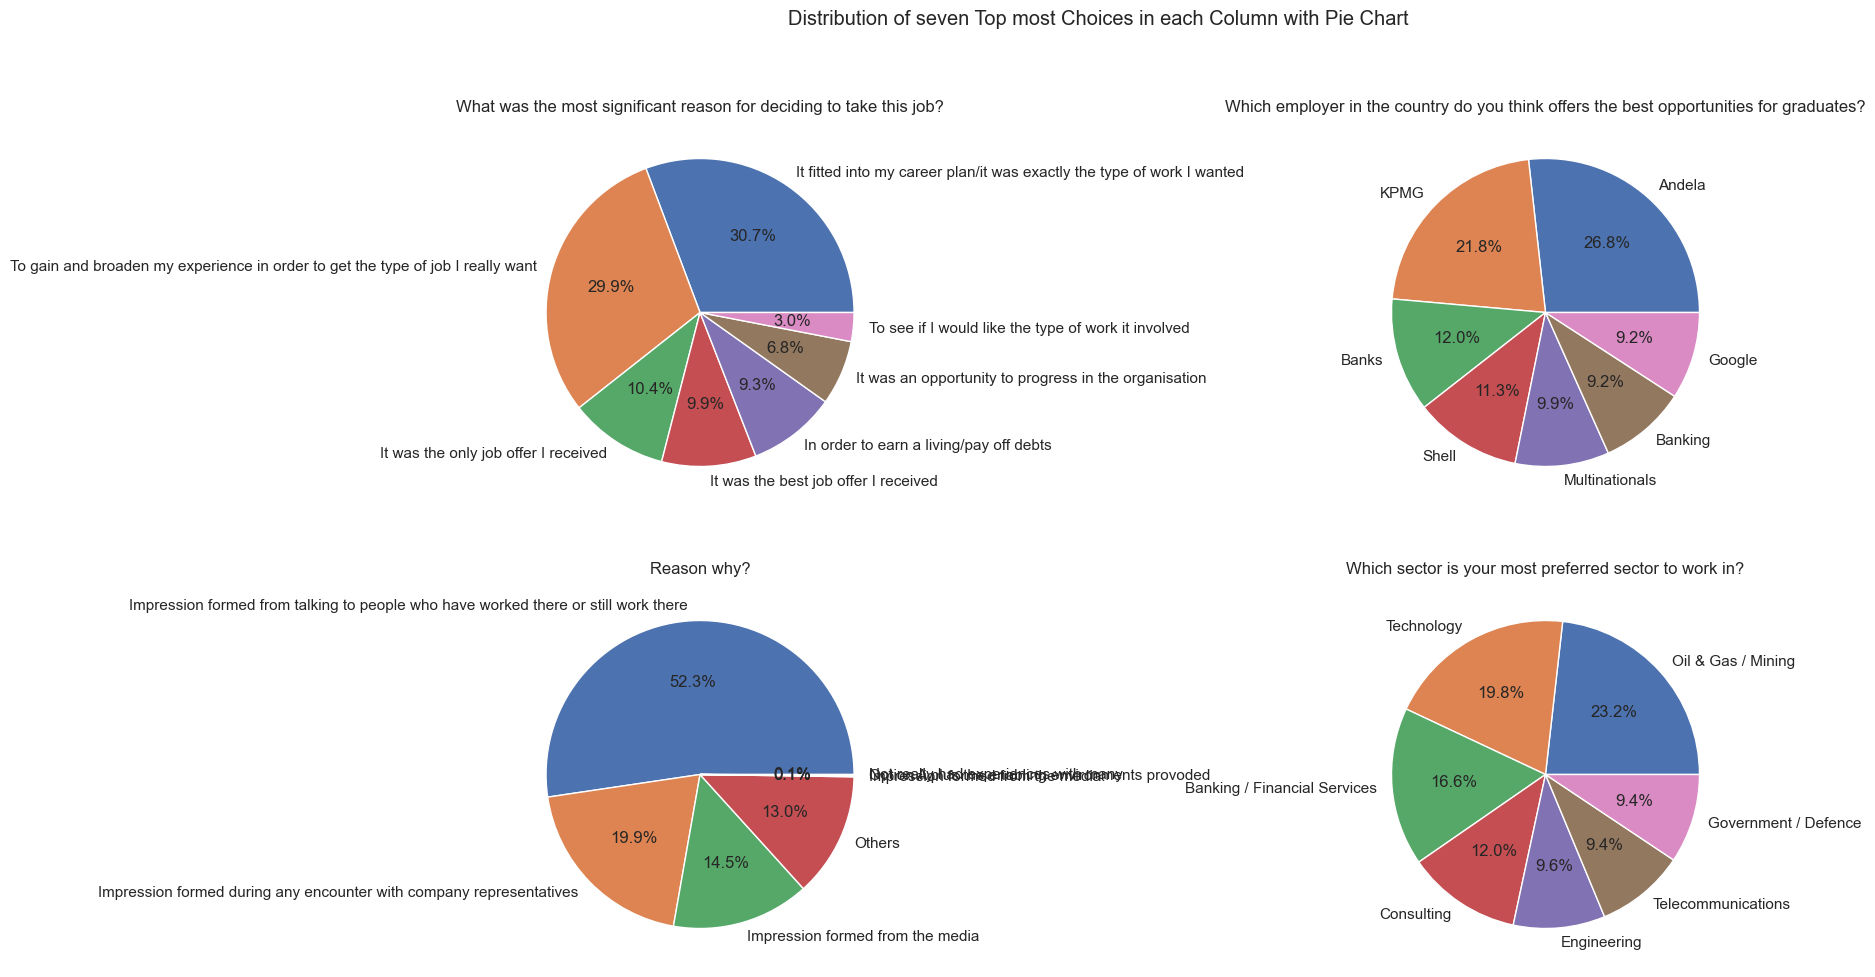

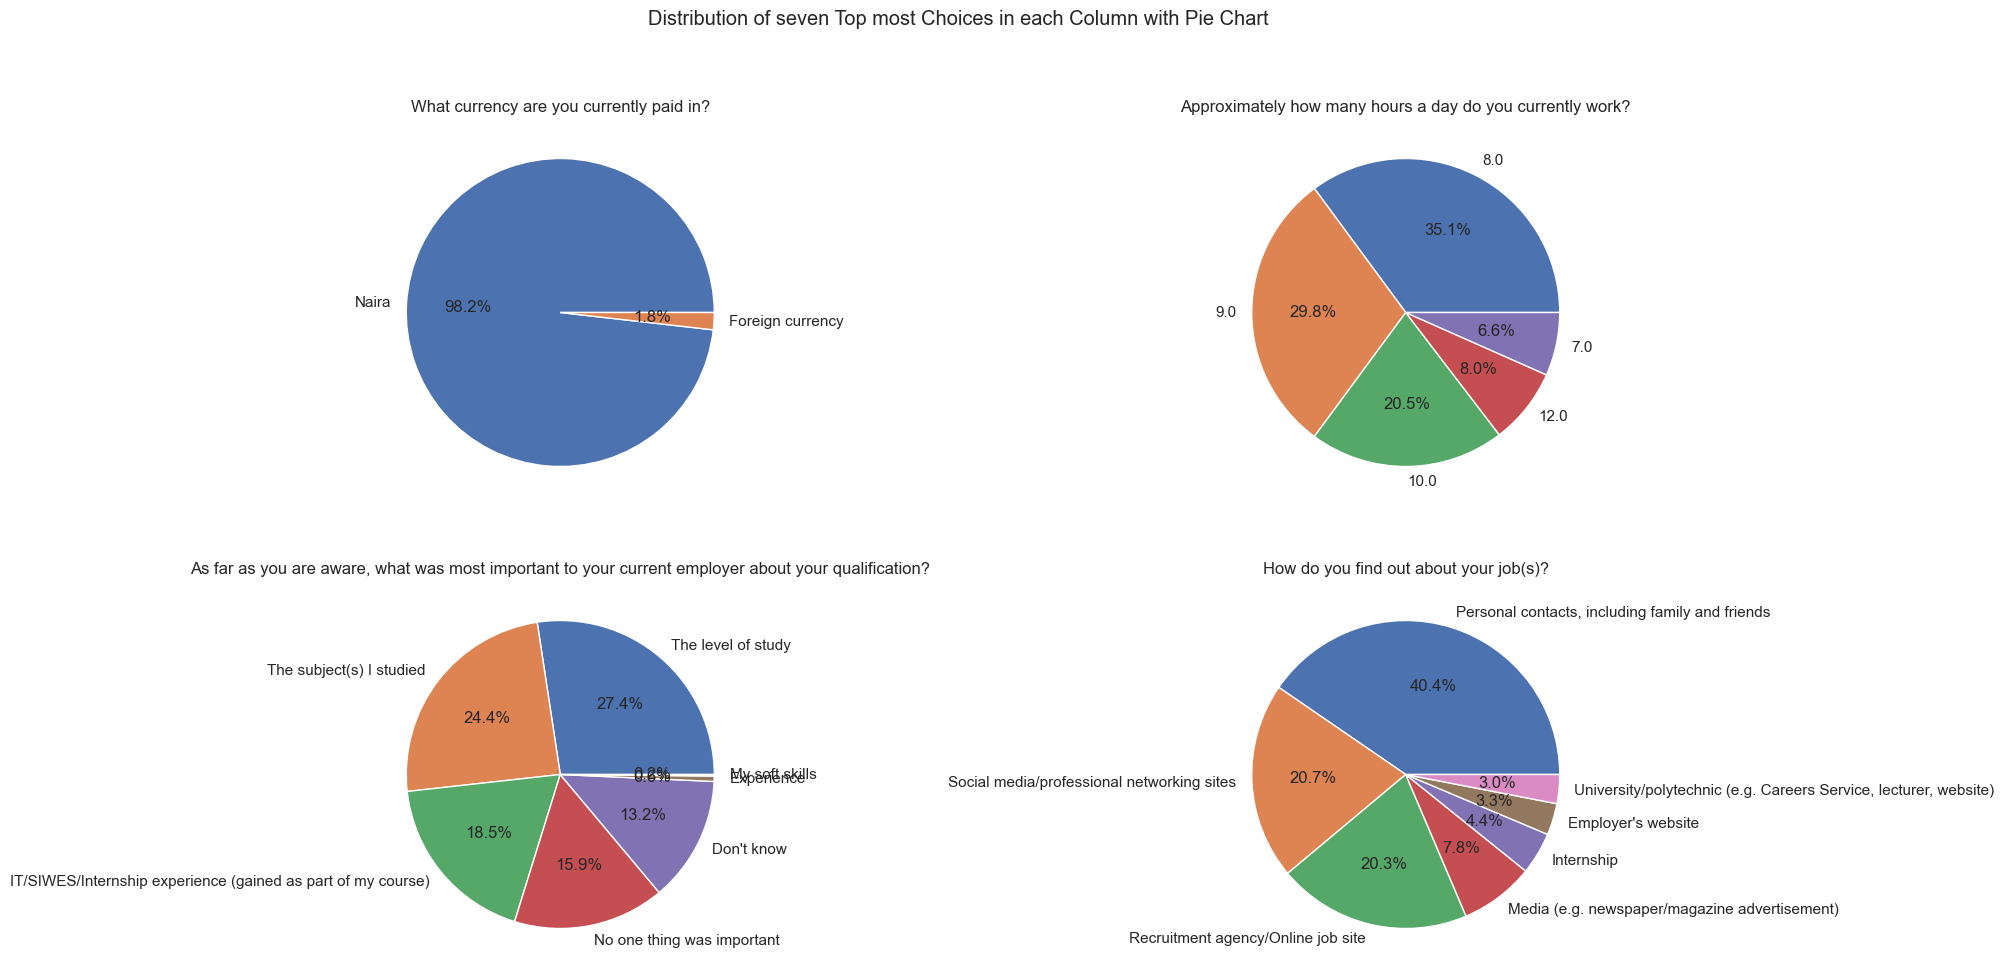

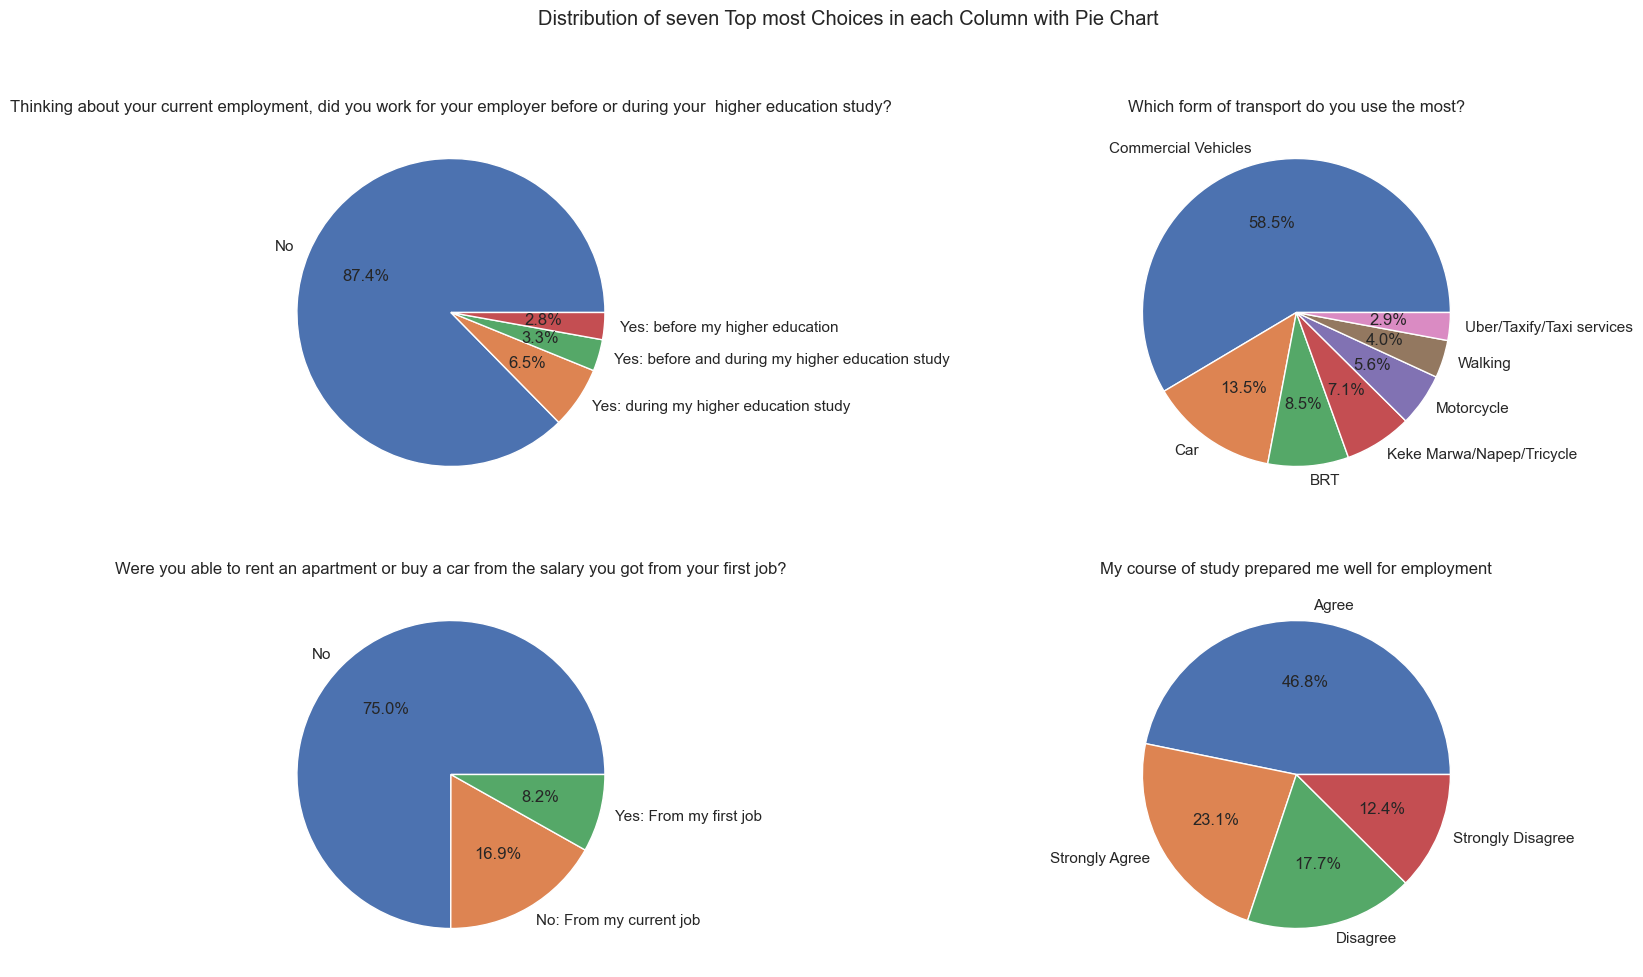

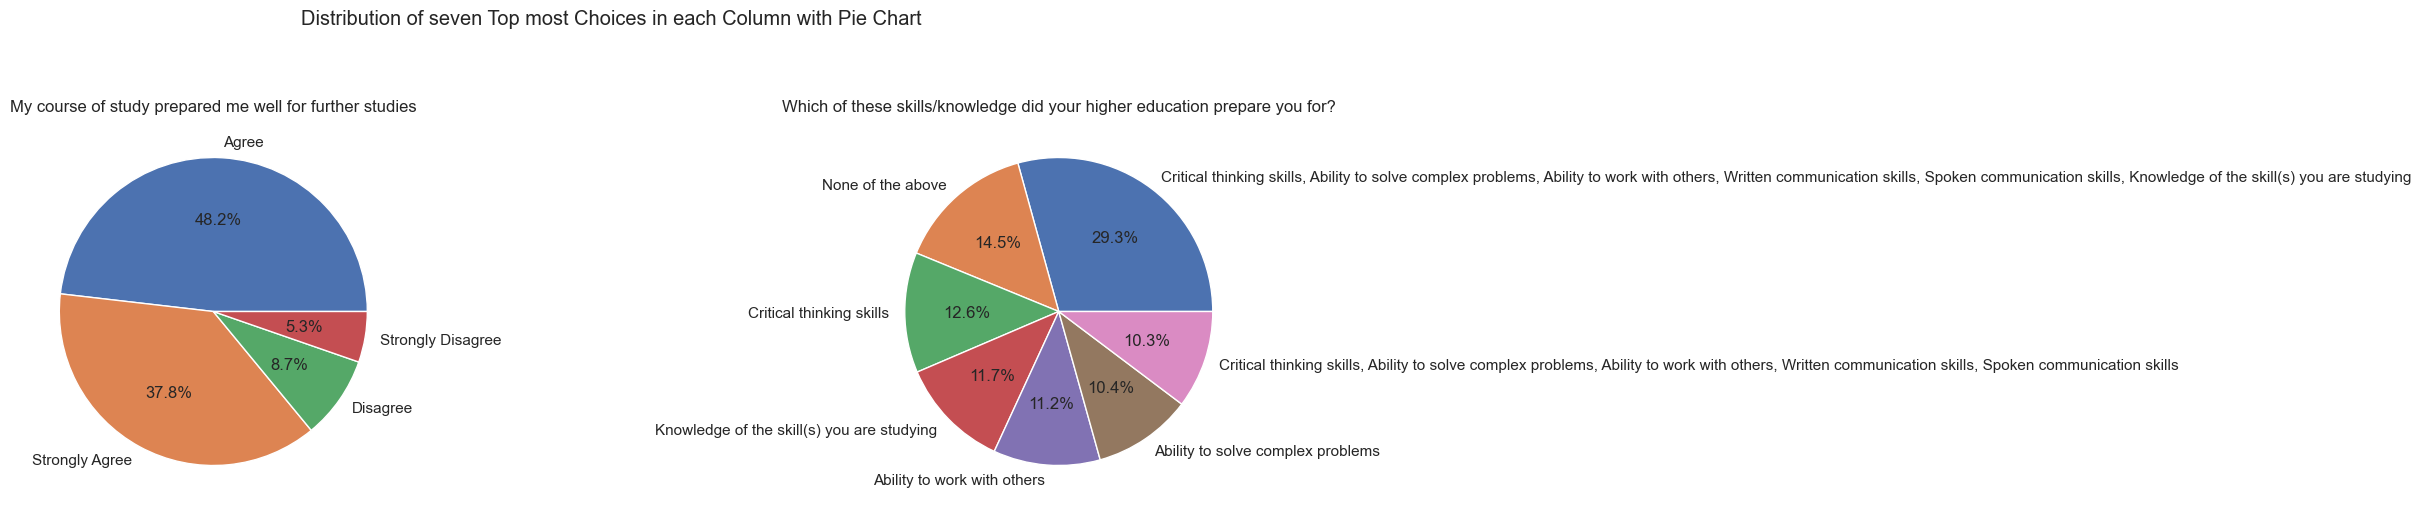

done


In [49]:
def PieChart(colummn,title):
    m=Survey[colummn].value_counts()[:7]
    label=[i for i in m.index]
    freq=[m[i] for i in label]
    myLabels=[i for i in label]
    plt.pie(freq,labels=myLabels,autopct='%1.1f%%')
    plt.title(colummn)
    

def PieGroup(arr):
    #sns.set(style="whitegrid")
    plt.figure(figsize=(20,11))
    for i in range(len(arr)):
        plt.subplot(2,2,i+1)
        PieChart(arr[i],arr[i])
    plt.suptitle('Distribution of seven Top most Choices in each Column with Pie Chart')
    plt.show()

def RegraphPie(allColumns):
    PieGroup(allColumns[0:4])
    if allColumns[4:]==[]:
        print('done')
    else:
        RegraphPie(allColumns[4:])

allColumns = [i for i in Survey.columns]    
RegraphPie(allColumns)

#### Visualizing the distribution of each columns with only the seven topmost choices using bar chart

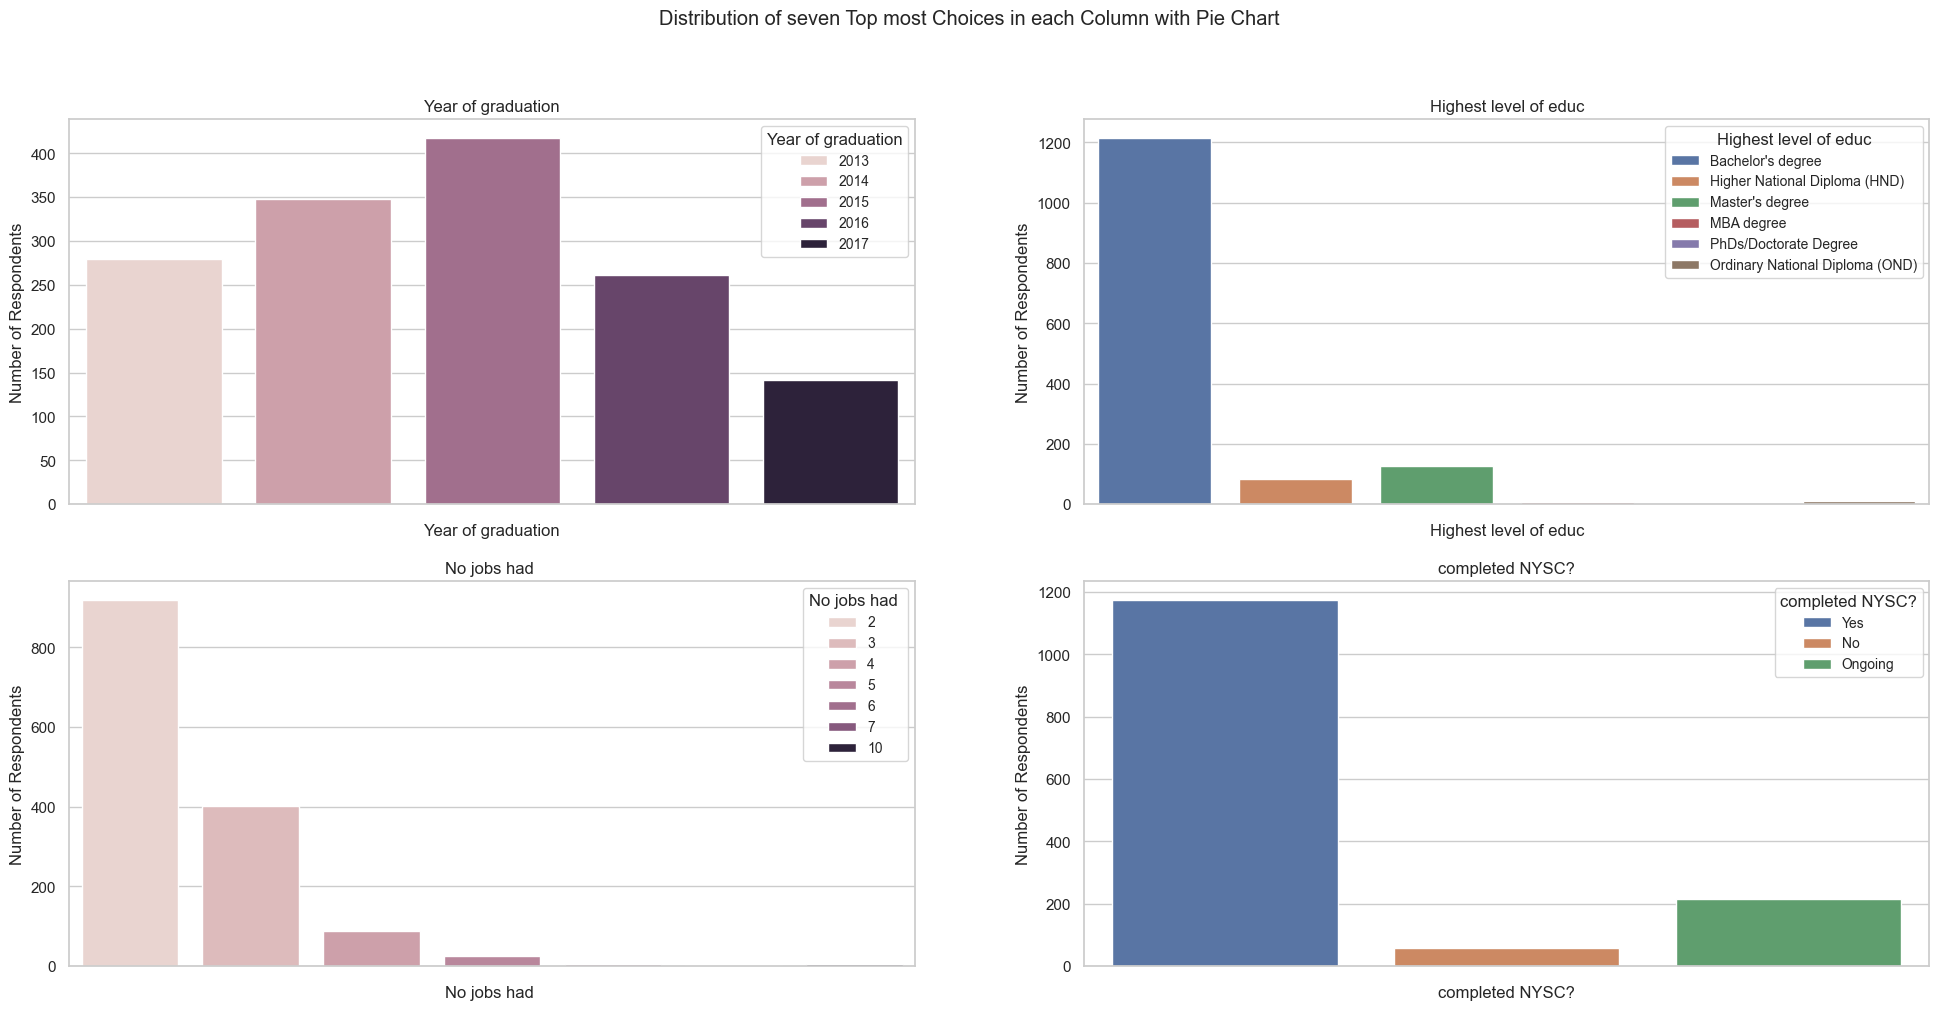

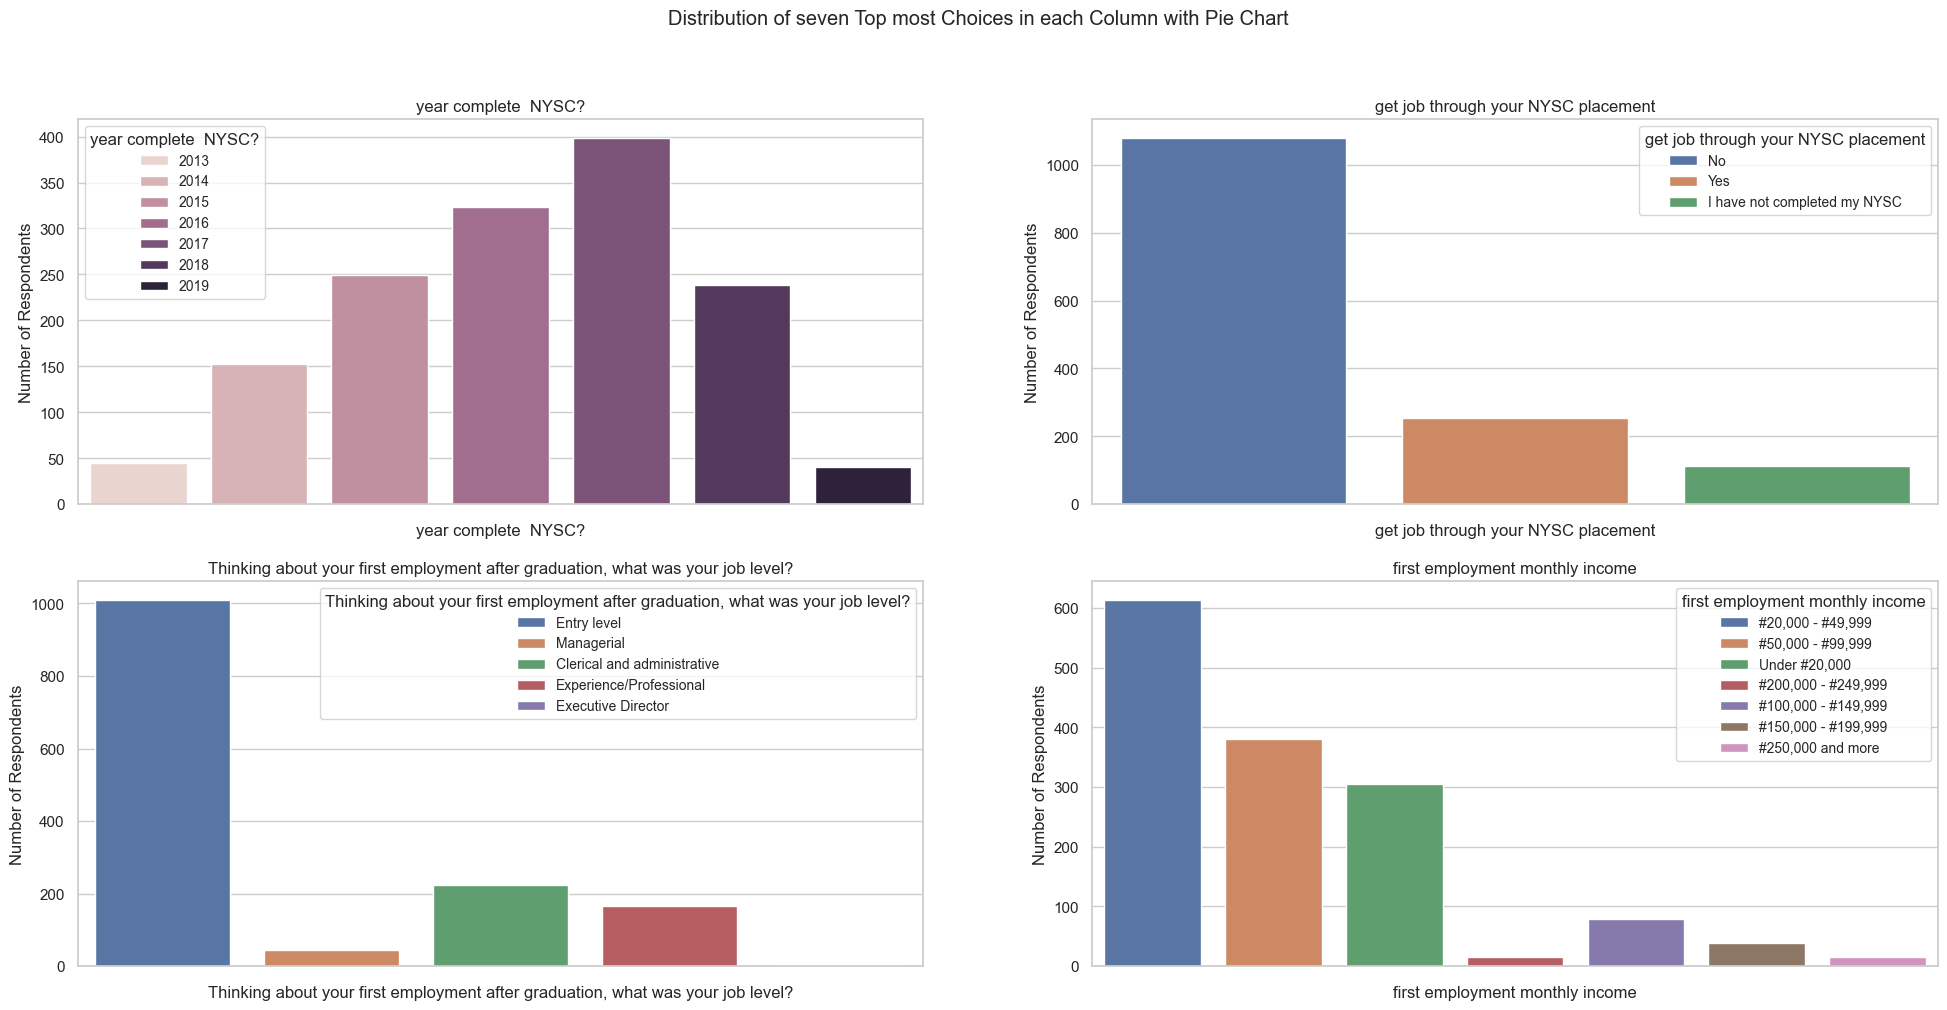

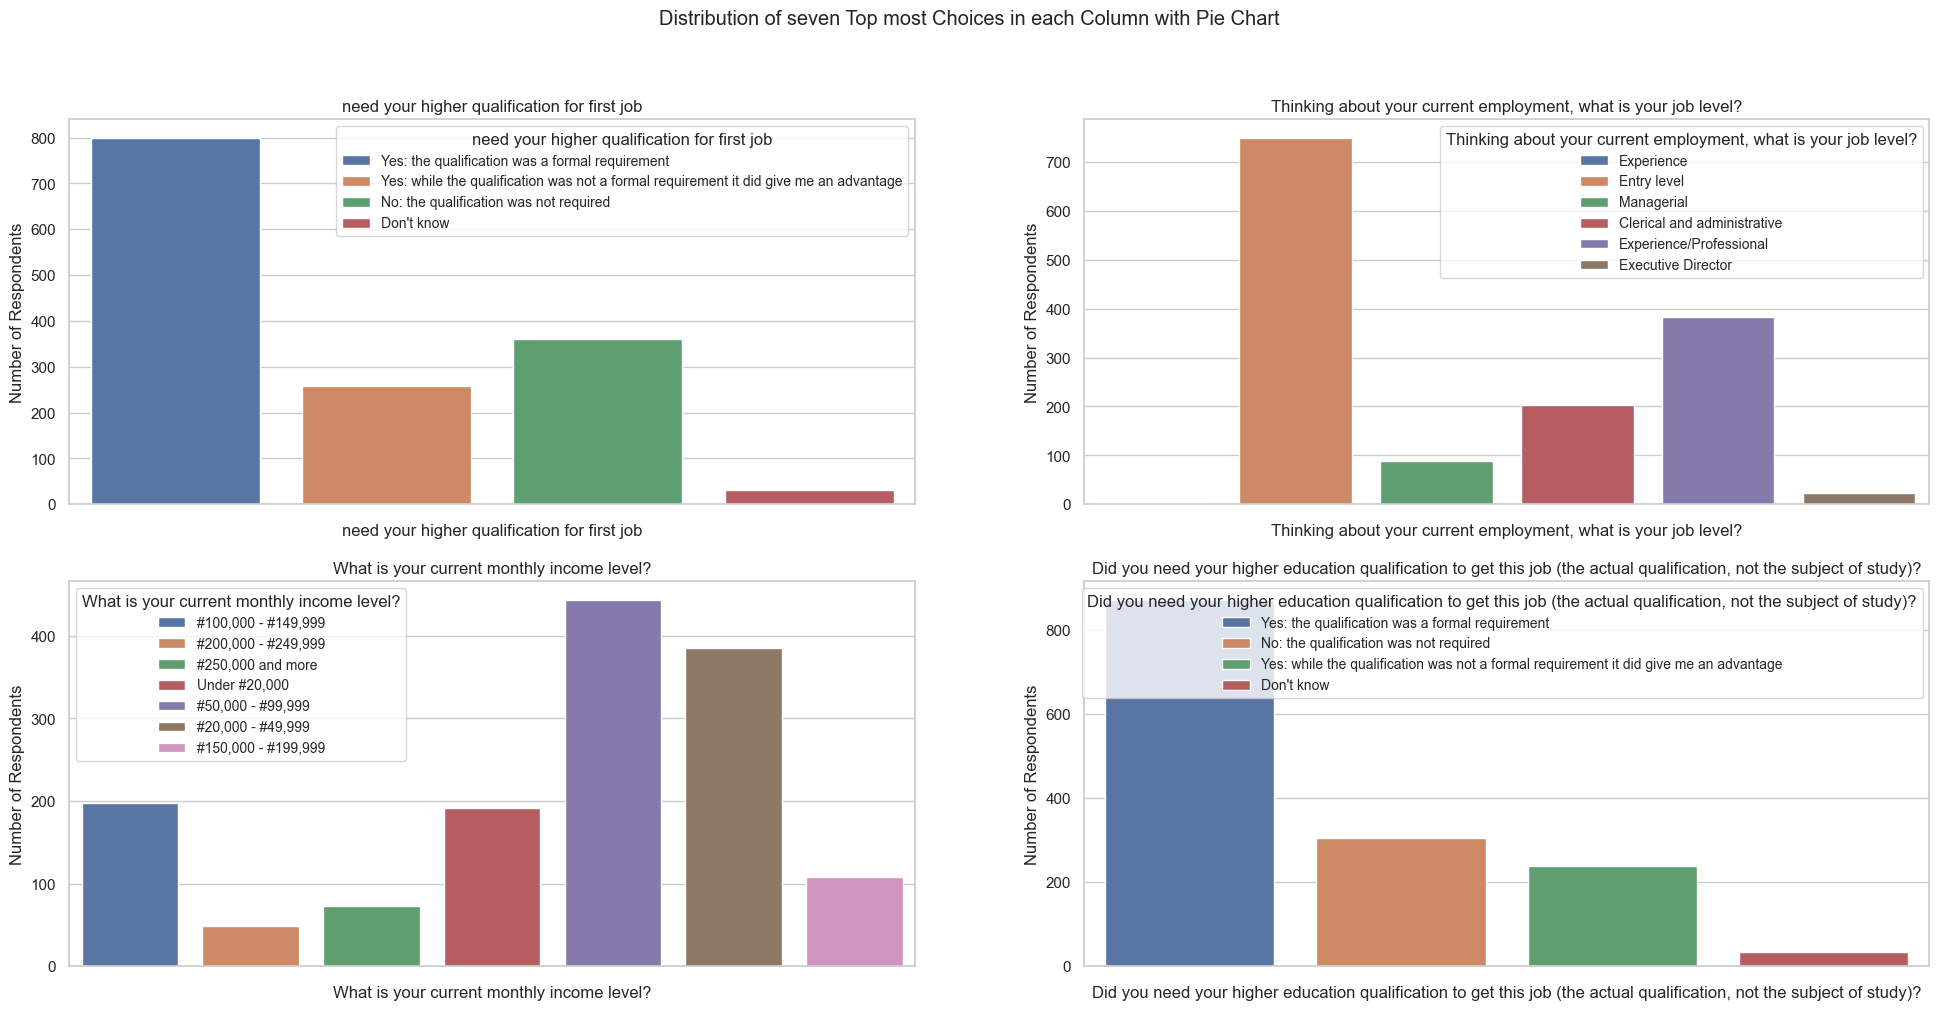

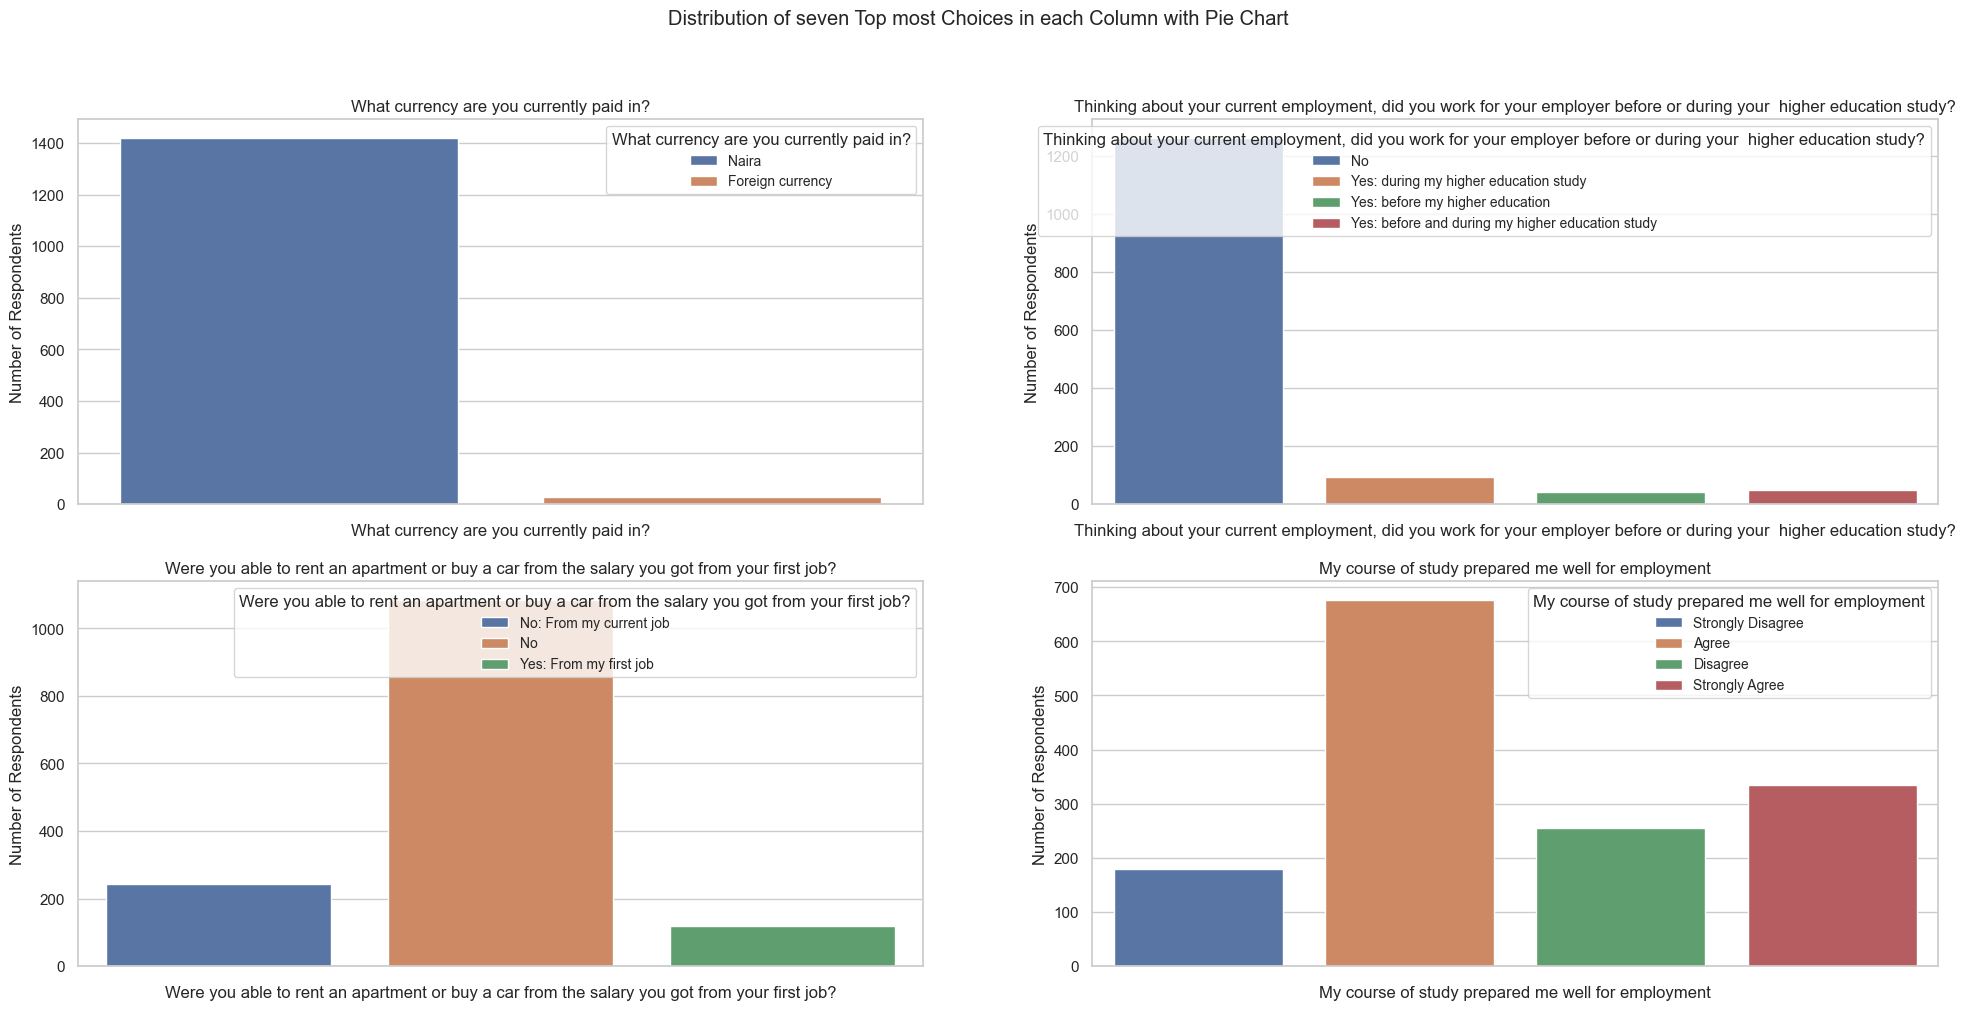

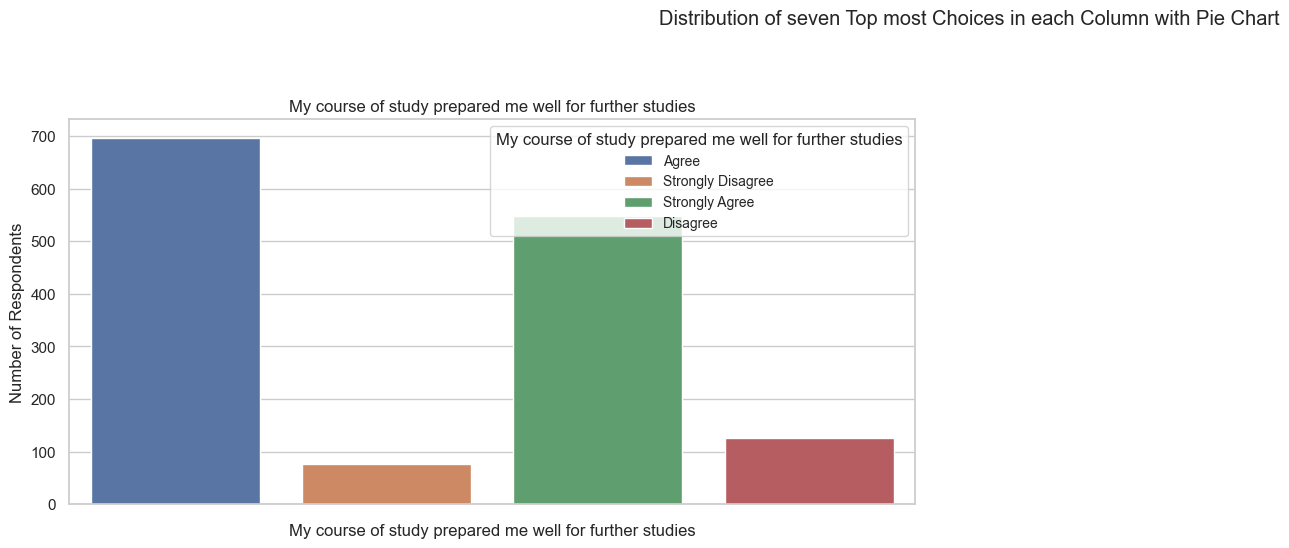

In [ ]:
def barChart(column):
    myLabel=set(Survey[column])
    plt.ylabel('Number of Respondents')
    ST=sns.countplot(data=Survey,x=column,hue=column, legend=myLabel)
    ST.set_xticklabels([])
    plt.rcParams['legend.fontsize']=10
    plt.title(column)


def BarGroup(arr):
    #sns.set(style="whitegrid")
    plt.figure(figsize=(24,11))
    for i in range(len(arr)):
        plt.subplot(2,2,i+1)
        barChart(arr[i])
    plt.suptitle('Distribution of seven Top most Choices in each Column with Pie Chart')
    plt.show()

def RegraphBar(allColumns):
    BarGroup(allColumns[0:4])
    if allColumns[4:]==[]:
        print('')
    else:
        RegraphBar(allColumns[4:])

allColumns=Survey.columns
selectedColumns=[col for col in allColumns if len(set(Survey[col]))<=7]
RegraphBar(selectedColumns)
    

#### Find the Pair of column that association exist between them using Chi-square

In [ ]:
allColumns=Survey.columns
def ChiSq(var1,var2):
    from scipy.stats import chi2_contingency
    Ct=pd.crosstab(var1,var2)
    chi2,p,df,expected = chi2_contingency(Ct)
    return {'chi2':chi2,'p':p, 'df':df}

def CheckSignificantAssociationa(allColumn):
    m=[]
    for i in allColumn[1:]:
        for j in allColumn[1:]:
            if not(i==j):
                result=ChiSq(Survey[i],Survey[j])
                if result['p']<0.05:
                    m.append([i,j,result['p']])
    return m

CheckSignificantAssociationa(allColumns)        

[['Title of course studied', 'School', 0.005098983406683928],
 ['Title of course studied', 'Highest level of educ', 9.78898530607979e-42],
 ['Title of course studied', 'current status', 0.002272680327959359],
 ['Title of course studied', 'No jobs had ', 0.04885216710886902],
 ['Title of course studied', 'completed NYSC?', 0.006362801289660794],
 ['Title of course studied',
  'get job through your NYSC placement',
  0.04824018580478177],
 ['Title of course studied',
  'Thinking about your first employment after graduation, what was your job level?',
  0.030745347258009998],
 ['Title of course studied', 'your job role', 0.0],
 ['Title of course studied', 'sector your company', 8.776433497362447e-139],
 ['Title of course studied',
  'first employment monthly income',
  1.0749576033277888e-07],
 ['Title of course studied', 'What is your job role?', 0.0],
 ['Title of course studied',
  'What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)',
  2.93792625761